# Feature selection Techniques:

This notebook consists in detailing the most appropriate features according to different feature selection techniques

## Filter Methods 

Calaculate the correlations between the features and target attributes

### Divide of features into two categories : 
    - Categorical features (Nominal): albumin - sugar - red_blood_cells  - pus_cell  - pus_cell_clumps  - bacteria  - hypertension  - diabetes_mellitus  - coronary_artery_disease  - appetite  - peda_edema  - aanemia  - classification
 
    - Numearical features (Ordinal) : age  - blood_pressure  - specific_gravity    - blood_glucose_random  - blood_urea  - serum_creatinine  - sodium  - potassium  - hemoglobin  - packed_cell_volume  - white_blood_cell_count  - red_blood_cell_count
    

To divide them I did check the values in the dataset of each feature and the meaning behind it 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [6]:
clean_df = pd.read_csv(r'Data/clean_dataset.csv')
clean_df.head()
target='classification'

In [5]:
cat_features=['albumin' ,
              'sugar' ,
              'red_blood_cells'  ,
              'pus_cell'  ,
              'pus_cell_clumps'  ,
              'bacteria'  ,
              'hypertension'   ,
              'diabetes_mellitus'  ,
              'coronary_artery_disease'  ,
              'appetite'   ,
              'peda_edema'  ,
              'aanemia']

In [4]:
num_features=['age'  ,
              'blood_pressure'  ,
              'specific_gravity'    ,
              'blood_glucose_random'  ,
              'blood_urea'  ,
              'serum_creatinine'  ,
              'sodium'  ,
              'potassium'  ,
              'hemoglobin'  ,
              'packed_cell_volume',
              'white_blood_cell_count'  ,
              'red_blood_cell_count']

### Correlation between numerical features (Pearson)

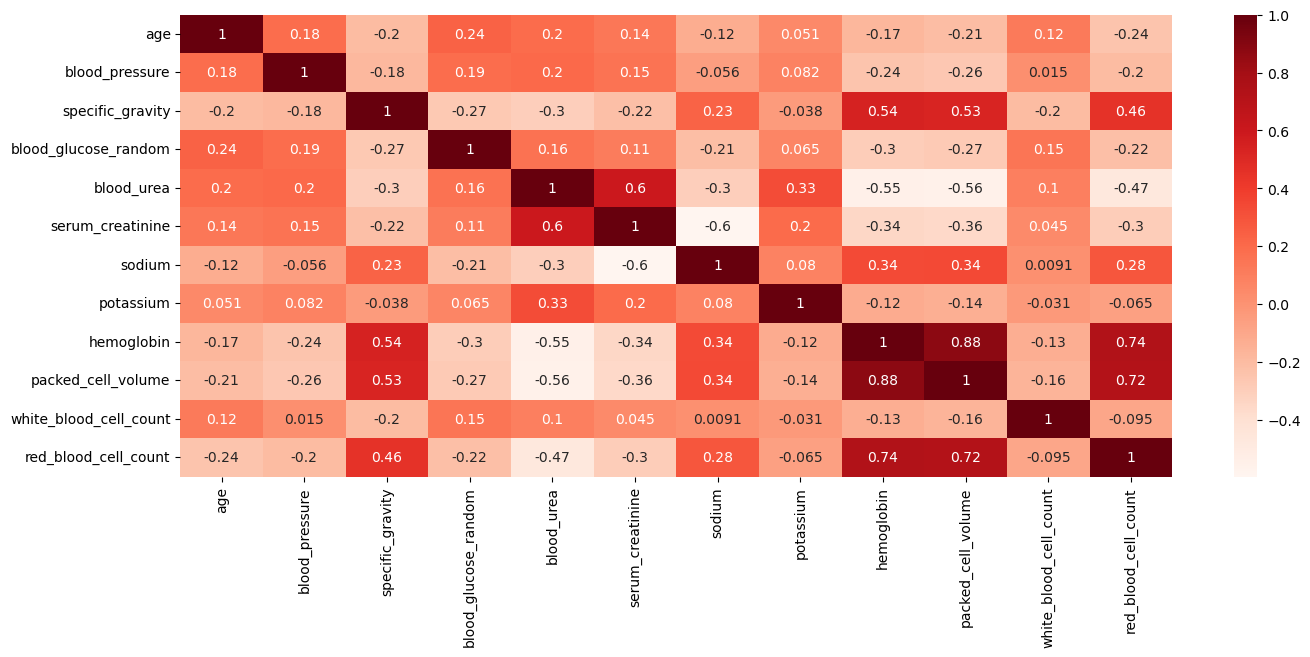

In [9]:
corr=clean_df[num_features].corr()

plt.figure(figsize=(16, 6))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
# strongly  correlated feature are 0.7 and more so we will select the thershold = 0.7
correlation_threshold=0.7

mask = (abs(corr) > correlation_threshold) & (abs(corr) <1)
strongly_correlated_features = corr[mask].stack().dropna().reset_index()

selected_features = set(strongly_correlated_features['level_0']).union(strongly_correlated_features['level_1'])

strongly_correlated_features

,level_0,level_1,0
0,hemoglobin,packed_cell_volume,0.875959
1,hemoglobin,red_blood_cell_count,0.736976
2,packed_cell_volume,hemoglobin,0.875959
3,packed_cell_volume,red_blood_cell_count,0.722623
4,red_blood_cell_count,hemoglobin,0.736976
5,red_blood_cell_count,packed_cell_volume,0.722623


In [11]:
selected_features

{'hemoglobin', 'packed_cell_volume', 'red_blood_cell_count'}

In [12]:
def maximizeCorrelation(corr,selected_features):
    max=0
    best_feature_tokeep=''
    for feature in selected_features:
        s= corr[corr['level_0']==feature][0].sum()
        if s > max:
            max=s
            best_feature_tokeep=feature
    return [best_feature_tokeep,max]

In [13]:
maximizeCorrelation(strongly_correlated_features,selected_features)

['hemoglobin', 1.6129349030891473]

#### Conclusion:
- We can delete 'packed_cell_volume' and 'red_blood_cell_count' features and keep the 'hemoglobin' feature, as it maximizes the desired outcome.
- We need to first check the correlation of these features with the target variable before deciding whether to delete them.

### Correlation between numerical features and  the target (categorical variable) 

In [16]:
corr=[]
for feature in num_features:
    pb_corr, pb_p_value = stats.pointbiserialr(
        clean_df[feature],
        clean_df[target])
    print(pb_p_value)
    corr.append([feature,abs(pb_corr)])
corr=pd.DataFrame(corr,columns=['num_feature','correlation with the target'])

corr.sort_values(by='correlation with the target'  ,ascending=False)

8.392789036938872e-06
1.9686006522107304e-08
1.675787316709474e-63
2.805930418107037e-16
2.3841370493322035e-15
1.0793374570351648e-09
9.936634307936974e-13
0.22878924665918637
7.561046000842274e-69
1.9969221393150848e-57
4.7214769056113225e-05
2.712662249154867e-39


,num_feature,correlation with the target
8,hemoglobin,0.733923
2,specific_gravity,0.713634
9,packed_cell_volume,0.688205
11,red_blood_cell_count,0.592644
3,blood_glucose_random,0.393667
4,blood_urea,0.382051
6,sodium,0.346545
5,serum_creatinine,0.298803
1,blood_pressure,0.276125
0,age,0.220684


Conclusion:
- hemoglobin, specific_gravity ,packed_cell_volume 	,red_blood_cell_count 

# RQ:
- Can add LDA (the model finds linear combinations of the features that achieve maximum separability between the classes and minimum variance within each class)
- PCA as preprocessing step